In [1]:
from gammapy_tools.fake_source_coordinates import LocationFaker
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np


In [2]:
known_sources = [
    SkyCoord.from_name("Crab"),
    SkyCoord.from_name("Zeta Tau"),
]
target_obs = "/raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis/64080.anasum.fits"
fake_obs = "/raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis/64081.anasum.fits"
output_obs = "/raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis_mimic/64080.anasum.fits"
output_obs_scrambled = "/raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis_mimic_scrambled/64080.anasum.fits"

In [3]:
my_faker = LocationFaker()

# Just mimic coordinates
my_faker.convert_fov(target_obs, fake_obs, output_obs, overwrite = True )
# Mimic coordinates and scramble data
my_faker.convert_fov(target_obs, fake_obs, output_obs_scrambled, scramble_point=known_sources, overwrite = True, scramble_theta = 0.35 )

In [4]:
with fits.open(target_obs) as hdul:
    target_events = Table.read(hdul[1])

with fits.open(output_obs) as hdul:
    faked_events = Table.read(hdul[1])

with fits.open(output_obs_scrambled) as hdul:
    faked_scrambled_events = Table.read(hdul[1])

target_events[:5]

EVENT_ID,TIME,RA,DEC,ENERGY,ALT,AZ,Xoff,Yoff
,s,deg,deg,TeV,deg,deg,,
int64,float64,float32,float32,float32,float32,float32,float32,float32
386,242909531.9657848,84.420685,22.402006,0.25014693,77.08284,133.35278,0.48586053,-0.55413985
1556,242909534.4139045,84.18137,22.179873,0.15221624,77.179474,135.41394,0.17378567,-0.5825698
1601,242909534.5072469,82.883896,23.668589,0.18350166,79.08773,135.12091,0.21996112,1.3261166
1958,242909535.2373116,83.23213,20.844967,0.28404507,76.64849,142.09604,-1.3615988,-1.0361047
4386,242909540.5288383,83.17759,21.872982,0.58766425,77.52989,139.70503,-0.7355581,-0.21915773


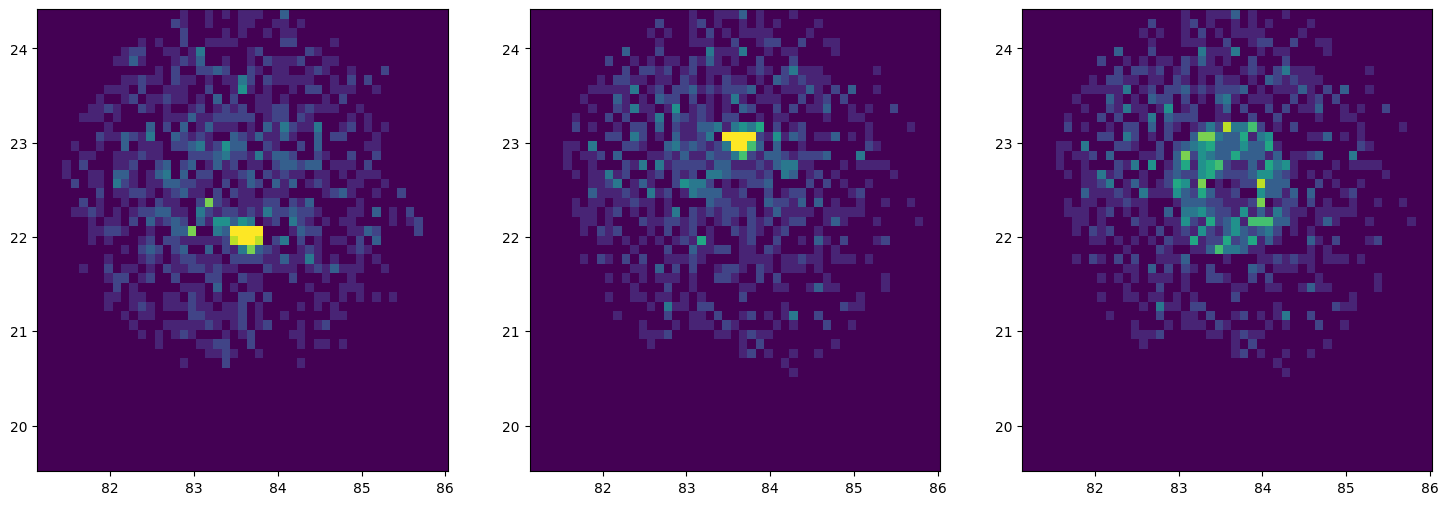

In [5]:
fig, ax = plt.subplots(1,3, figsize = (18,6))

crab_loc = SkyCoord.from_name("Crab")
dbin = 0.1
bins_ra = np.arange(crab_loc.ra.deg - 2.5, crab_loc.ra.deg + 2.5, dbin)
bins_dec = np.arange(crab_loc.dec.deg - 2.5, crab_loc.dec.deg + 2.5, dbin)


ax[0].hist2d(target_events["RA"], target_events["DEC"], bins = [bins_ra, bins_dec], vmin = 0, vmax=10);
ax[1].hist2d(faked_events["RA"], faked_events["DEC"], bins = [bins_ra, bins_dec], vmin = 0, vmax=10);
ax[2].hist2d(faked_scrambled_events["RA"], faked_scrambled_events["DEC"], bins = [bins_ra, bins_dec], vmin = 0, vmax=10);